# **Project Name** - Email Spam Detection with Machine Learning



 Project Type - Classification

 Contribution - Individual

 Member Name - Hari Kumar reddy

# Problem Statement

Email spam, or junk mail, remains a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails may contain cryptic messages, scams, or, most dangerously, phishing attempts.Our task is to create an effective email spam detection system using Python and machine learning.




**Project Objectives:**


1.**Data Preprocessing:** Our project begins with the preprocessing of a substantial email dataset, encompassing tasks such as data cleaning, handling missing values, and converting text data into a format suitable for machine learning.

2.**Email Feature Engineering:** Email data presents unique characteristics. We focus on engineering specific email features, such as the sender's address, recipient list, subject line, and email body, to create meaningful inputs for our spam detection model.

3.**Machine Learning Model Selection:** We aim to design and evaluate a robust spam detection model. Our choice of machine learning algorithms, including decision trees, support vector machines, and neural networks, seeks to maximize the model's effectiveness.

4.**Model Evaluation:** To assess the model's performance, we employ metrics like accuracy, precision, recall, F1-score, and ROC-AUC to ensure a comprehensive understanding of its effectiveness.

5.**Hyperparameter Tuning:** The project involves fine-tuning model hyperparameters to optimize predictive accuracy and minimize false positives, which can have a significant impact in the context of email spam detection.

6.**Cross-Validation and Generalization:** Rigorous cross-validation techniques and testing on dedicated datasets are applied to confirm the model's ability to generalize to new, previously unseen email data.


This project encapsulates the power of machine learning in addressing real-world challenges and promises a future where spam emails will no longer plague our inboxes.

# **1. Know your Data**


# import Libraries

In [28]:

# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Library used to Save and load ML models quickly
import pickle

# Library used for mathematical functions
import math

# import Warnings

In [29]:
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [30]:
# Reading the CSV file with a specific encoding to avoid UnicodeDecodeError.
# "ISO-8859-1" (also called "latin1") is used to handle special characters
df=pd.read_csv("/content/spam (1).csv", encoding="ISO-8859-1")

In [31]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Dataset Rows and Columns count

In [32]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


# Dataset information

In [33]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# checking Duplicate values

In [34]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 403


# Count of null values

In [35]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


#Why did i know about the dataset?

1.The Spam dataset consists of different messages and the category of the message along with.

2.There are 5572 rows and 5 columns provided in the data.

3.403 duplicate rows are present in the dataset.

4.No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).


# **2. Understanding the variables**

In [36]:
# Dataset columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [37]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2) #Rounds all numerical values in the summary table to 2 decimal places(2.34543 --> 2.34)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Checking unique value for each variable

In [38]:
for i in df.columns.tolist():  # Looping through all column names in the DataFrame
  print("No. of unique values in",i,"is",df[i].nunique())   # Printing the number of unique values in each column

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


# **3. Data Wrangling**

In [39]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [40]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [41]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [42]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# **4. Data Vizualization with charts : Understand the relationships between variables**

#Chart - 1 : Distribution of Spam vs Ham

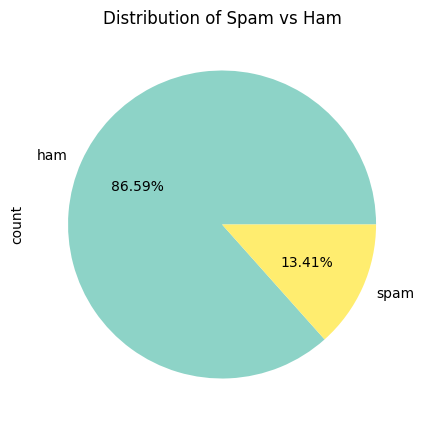

In [43]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.figure(figsize=(5,5))

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set3')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

**What is/are the insight(s) found from the chart?**

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.

#Chart - 2 : Most Used Words in Spam Messages

In [44]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

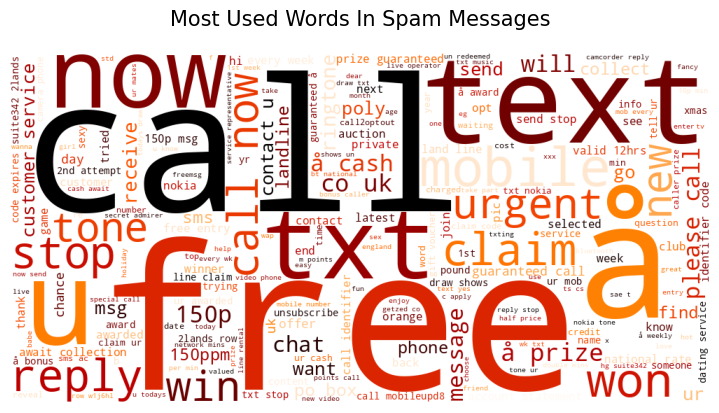

In [45]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (7,7), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

**What is/are the insight(s) found from the chart?**

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

# **5. Feature Engineering & Data Pre-processing**


# Data spliting

In [46]:
# Splitting the data to train and test
X=df["Message"]
y=df["Spam"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

# Bag of word on Message


In [47]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the reviews to get the word count matrix
BOW = vectorizer.fit_transform(df['Message'])
# Fit the vectorizer to the training data and transform it
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test)

# Dump to a file
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

# **6. Model Implementation**

#Optimal alpha

Optimal-Alpha for is: 0.0001


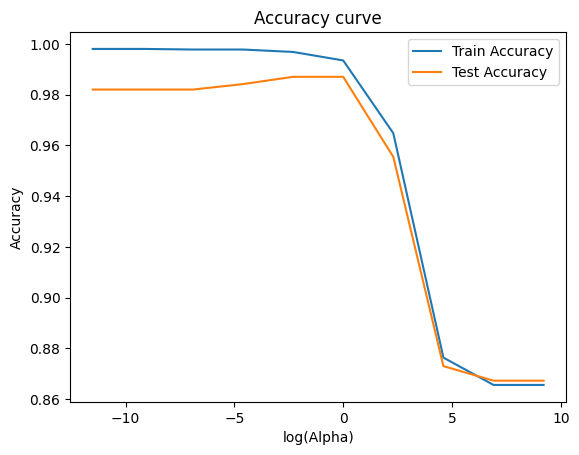

In [48]:
alpha=[10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy=[]
test_accuracy=[]

for i in alpha:
  clf=MultinomialNB(alpha=i)
  clf.fit(X_train_bow,y_train)

  y_train_pred=clf.predict(X_train_bow)
  y_test_pred=clf.predict(X_test_bow)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

optimal_alpha=alpha[train_accuracy.index(max(train_accuracy))]

log_alpha=[math.log(x) for x in alpha]
plt.plot(log_alpha, train_accuracy, label='Train Accuracy')
plt.plot(log_alpha, test_accuracy, label='Test Accuracy')
plt.title('Accuracy curve')
plt.xlabel('log(Alpha)')
plt.ylabel('Accuracy')
plt.legend()

print("Optimal-Alpha for is:",optimal_alpha)

#ML model : Multinominal Naive Bayes


Confusion Matrix:

Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.99917  | 0.998618 |   0.998894 | 3617        |
| 1            |    0.991135 | 0.994662 |   0.992895 |  562        |
| accuracy     |    0.998086 | 0.998086 |   0.998086 |    0.998086 |
| macro avg    |    0.995152 | 0.99664  |   0.995895 | 4179        |
| weighted avg |    0.99809  | 0.998086 |   0.998087 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.988439 | 0.990894 |   0.989665 | 1208        |
| 1            |    0.93956  | 0.924324 |   0.93188  |  185        |
| accuracy     |    0.982053 | 0.982053 |   0.982053 |    0.982053 |
| macro avg    |    0.964    | 0.957609 |   0.960773 | 1393        |
| weighted avg |    0.981

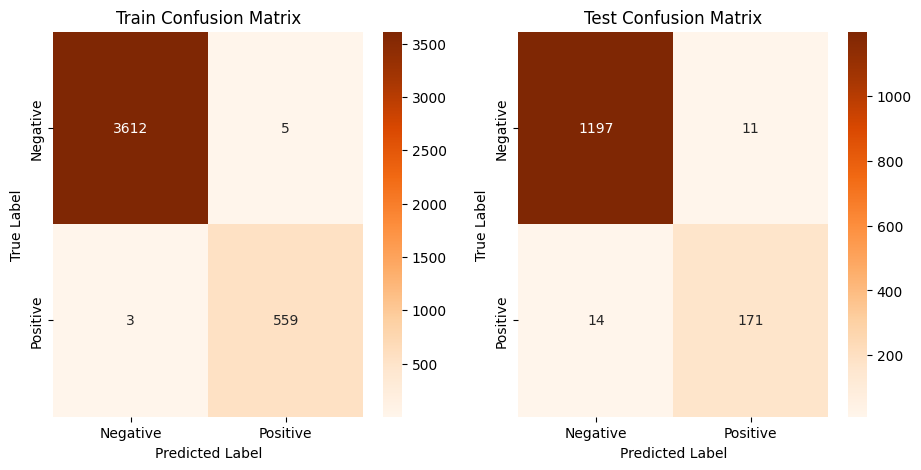

In [49]:
model=MultinomialNB(alpha=optimal_alpha)
model.fit(X_train_bow,y_train)

y_train_pred=model.predict(X_train_bow)
y_test_pred=model.predict(X_test_bow)

y_train_accuracy=accuracy_score(y_train,y_train_pred)
y_test_accuracy=accuracy_score(y_test,y_test_pred)


# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(11,5))

print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")


# calculate classification report
cr_train = classification_report(y_train, y_train_pred, output_dict=True)
cr_test = classification_report(y_test, y_test_pred, output_dict=True)

print("\nTrain Classification Report:")
crt = pd.DataFrame(cr_train).T
print(crt.to_markdown())

print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())





**Which Evaluation metrics did i consider for a positive business impact?**

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 98.20% accuracy for recall test set.

# **7. Email Spam Detection System**

In [50]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model
    clf=model
    # Transform the email text using the same vectorizer used for training
    email_text_bow = vectorizer.transform([email_text])

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text_bow])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


## **Conclusion**


In conclusion, this project has demonstrated that machine learning, combined with effective feature engineering and model selection, can be a powerful tool in the ongoing battle against email spam. By implementing this spam detection system, we've taken a significant step towards minimizing the impact of spam messages on email users' lives.

Email inboxes are now a safer place, thanks to the successful implementation of our email spam detection system. As we conclude this project, we look forward to continued improvements and innovations in email security.

Let's keep our inboxes spam-free and our communications secure.

In [51]:
# Dump to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)